In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm

In [3]:
ipd.Video("videos\\happy-video\\1107.mp4", width=700, embed=True)

In [4]:
cap = cv2.VideoCapture("videos\\happy-video\\1107.mp4")

In [5]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

55.0

In [6]:
cap.get(cv2.CAP_PROP_FPS)

30.0

In [7]:
cap.release()

In [8]:
cap = cv2.VideoCapture("videos\\happy-video\\1107.mp4")
ret, img = cap.read()

In [9]:
#helper function for plotting opencv images
def display_cv2_img(img, figsize=(19, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

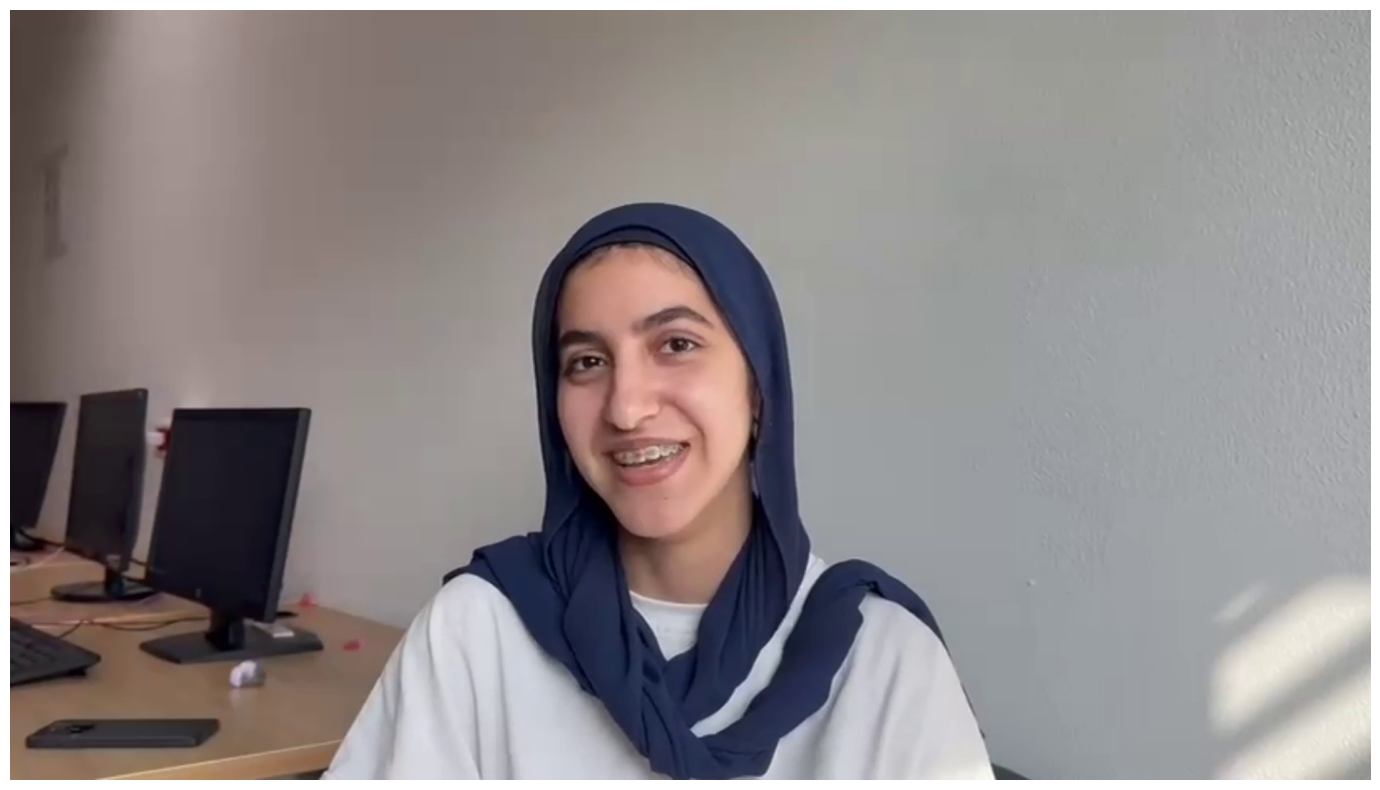

In [10]:
display_cv2_img(img)

In [11]:
cap.release()

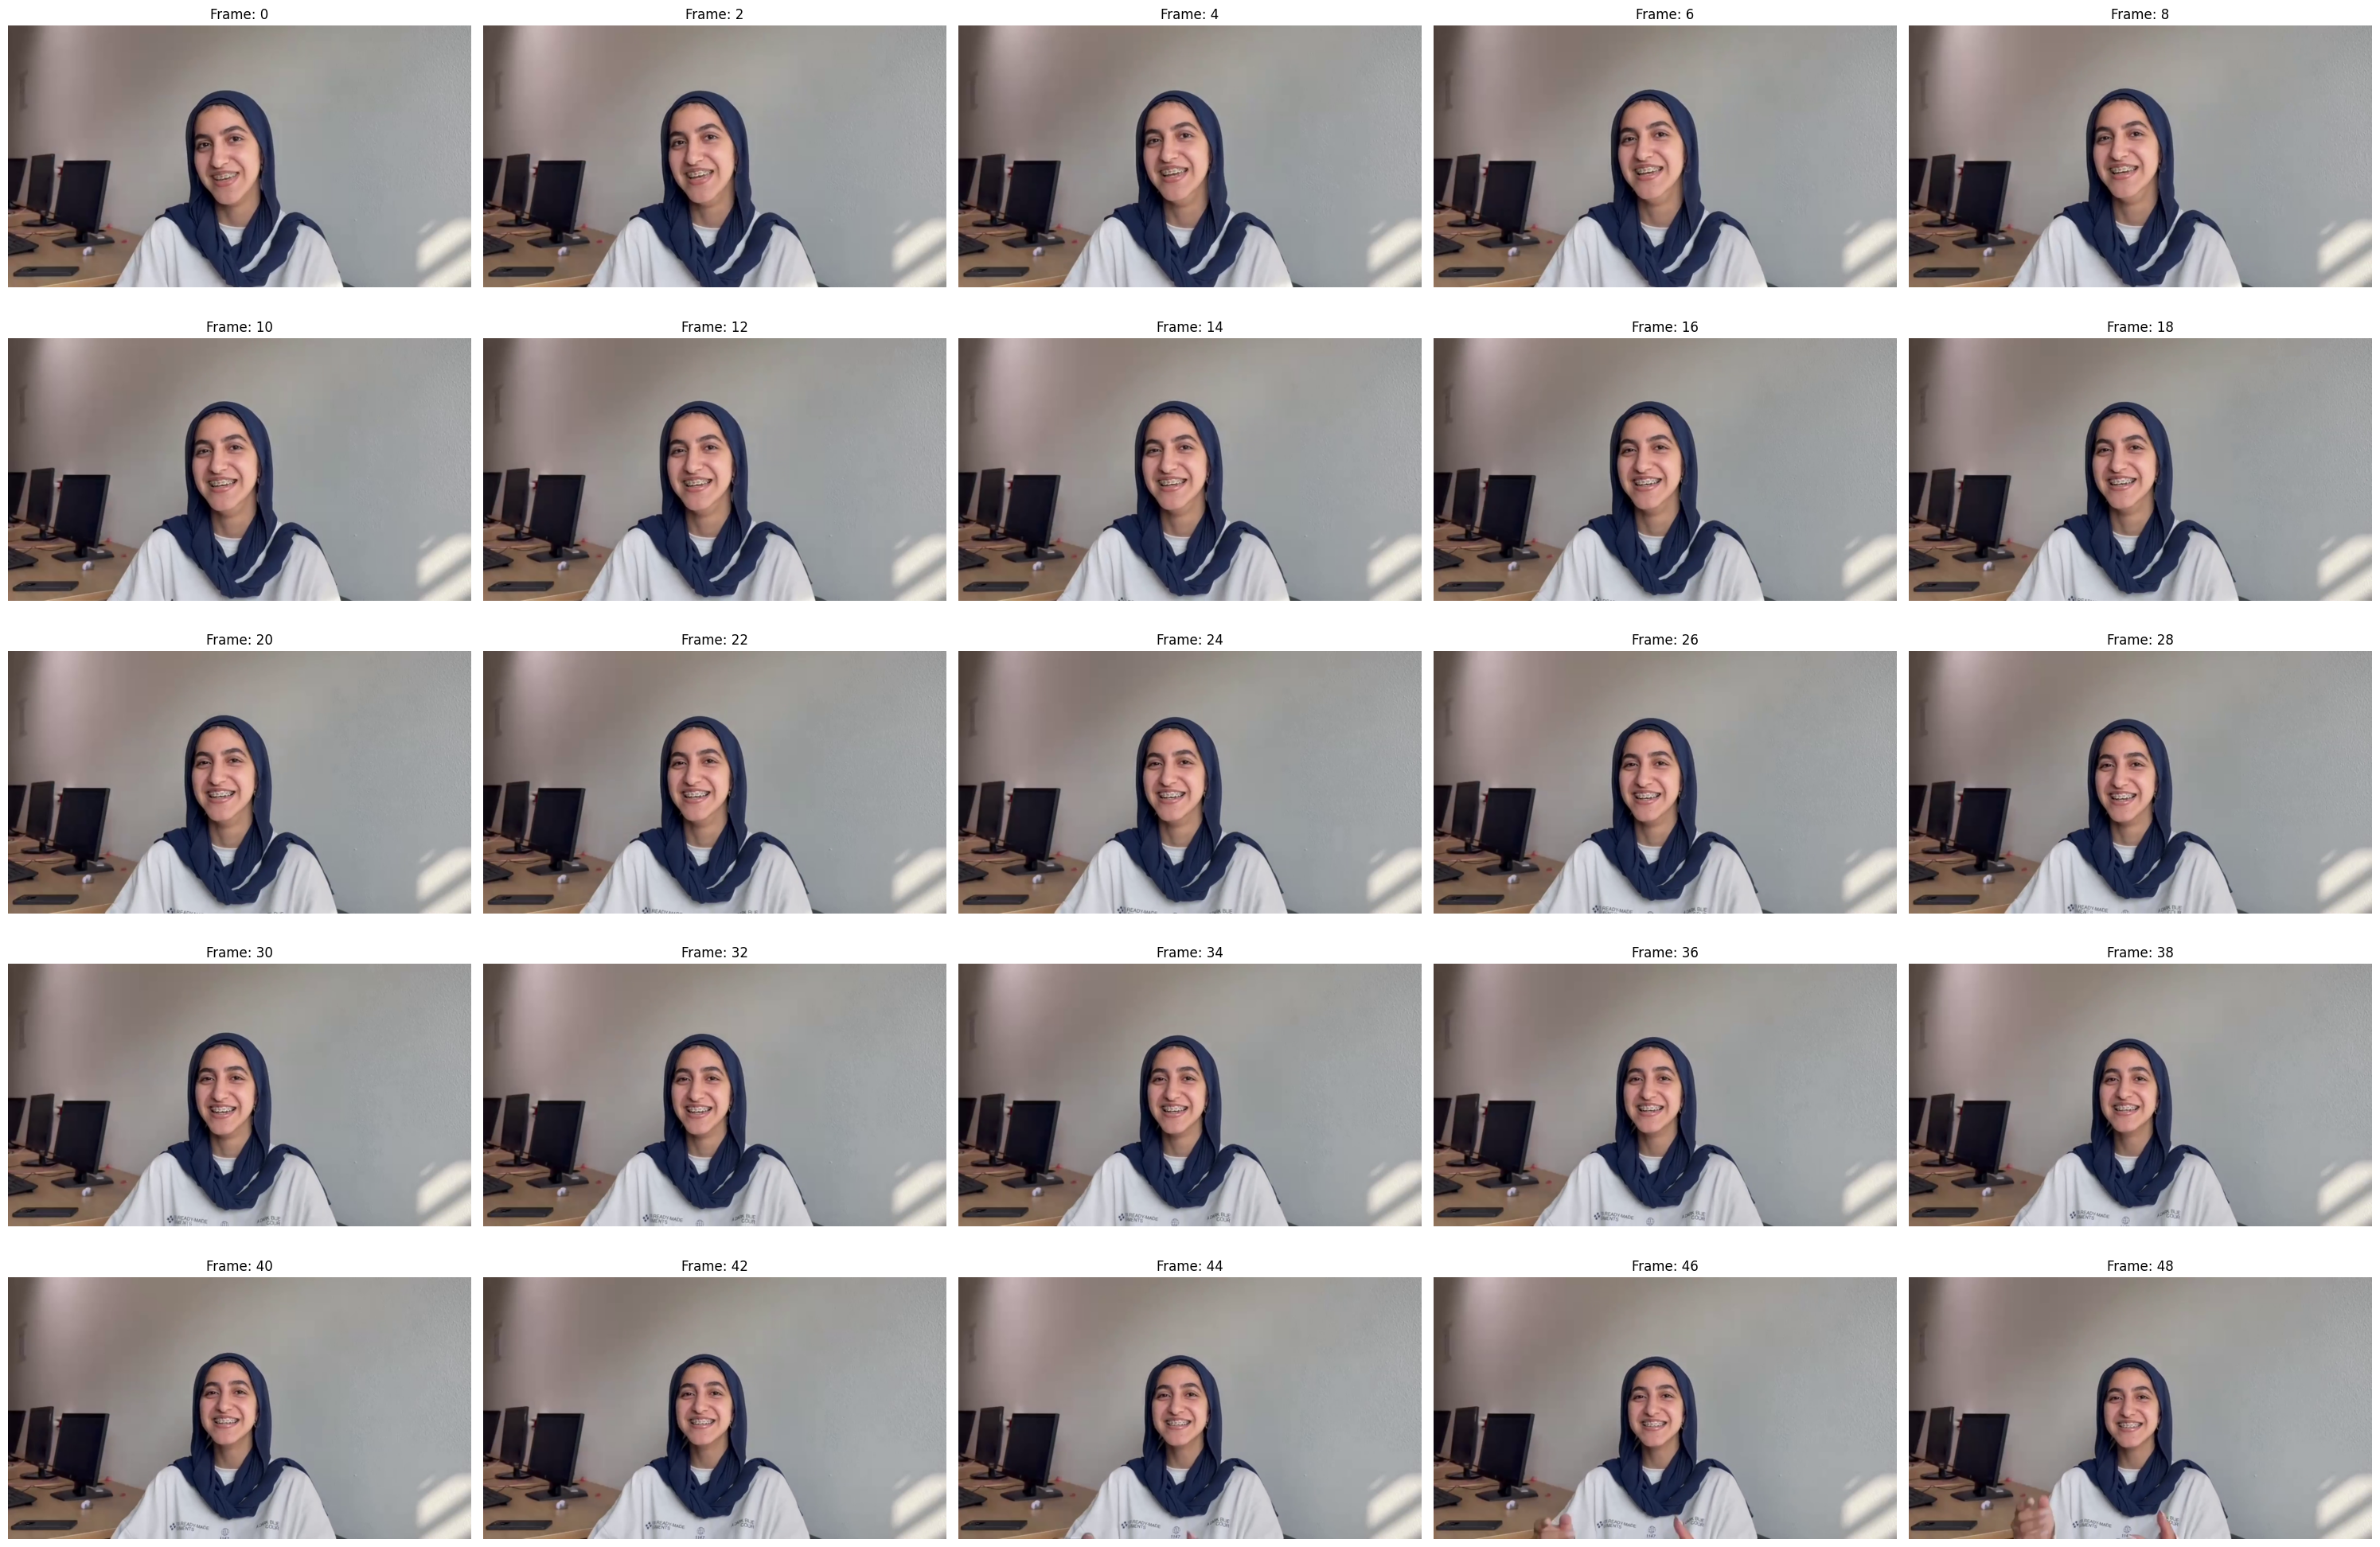

In [12]:
cap = cv2.VideoCapture("videos\\happy-video\\1107.mp4")
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frames_to_show = min(25, n_frames)  # We have 5x5=25 subplots

img_idx = 0
for frame in range(0, n_frames, n_frames//frames_to_show):
    ret, img = cap.read()
    if ret == False or img_idx >= 25:  # Stop if we reach subplot limit
        break
    axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[img_idx].set_title(f'Frame: {frame}')
    axs[img_idx].axis('off')
    img_idx += 1

plt.tight_layout()
plt.show()
cap.release()


In [13]:
import ndjson

# Open and read the NDJSON file
with open('video-input\\Happy.ndjson', 'r') as f:
    data = ndjson.load(f)

# Iterate through the parsed data
for item in data:
    print(item)

{'data_row': {'id': 'cmhphcl8x0m3l0766dfoqpmje', 'external_id': '1107(1).mp4', 'row_data': 'https://storage.labelbox.com/cmhoqmsrp191t070f3mb695t9%2F4721449f-faf8-63cd-5ab0-6991ff27025c-1107(1).mp4?Expires=1762990241&KeyName=labelbox-assets-key-20251022&Signature=0YDYIf_ta3eqf-Fz4ai2BL0MINc'}, 'media_attributes': {'height': 1080, 'width': 1908, 'asset_type': 'video', 'mime_type': 'video/mp4', 'frame_rate': 30, 'frame_count': 109}, 'metadata_fields': [{'value': 'Happy'}]}
{'data_row': {'id': 'cmhphcl8x0m3m0766arg1j7z5', 'external_id': '1107(1)2.mp4', 'row_data': 'https://storage.labelbox.com/cmhoqmsrp191t070f3mb695t9%2Fabac33e1-ee65-d5e6-ded4-522cce263a55-1107(1)2.mp4?Expires=1762990241&KeyName=labelbox-assets-key-20251022&Signature=2ApO7udZVeIJHd_2SHb7_NqezaU'}, 'media_attributes': {'height': 1080, 'width': 1908, 'asset_type': 'video', 'mime_type': 'video/mp4', 'frame_rate': 30, 'frame_count': 42}, 'metadata_fields': [{'value': 'Happy'}]}
{'data_row': {'id': 'cmhphcl8x0m3n0766xlzu4uid'

In [14]:
df = pd.DataFrame(data)
df.head()
df.shape

(24, 3)

In [15]:
df.drop(columns=['data_row', 'media_attributes'], inplace=True)
df.head()

metadata_fields
0  [{'value': 'Happy'}]
1  [{'value': 'Happy'}]
2  [{'value': 'Happy'}]
3  [{'value': 'Happy'}]
4  [{'value': 'Happy'}]